# Creating data sets of grain sizes of NEEM images
***
* Author: Yannick E. Heiser
* Email:  wfg813@alumni.ku.dk
* Last Updated:   6th March 2023
***

### Matplotlib figure settings in Jupyter Notebook
* **inline**: displays as static figure in code cell output
* **notebook**: displays as interactive figure in code cell output
* **qt**: displays as interactive figure in a separate window

In [1]:
%matplotlib inline 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import glob
import os
plt.rcParams['axes.labelsize'] = 16
plt.rcParams['font.size'] = 16
plt.rcParams['axes.titlesize'] = 20
plt.rcParams['xtick.labelsize'] = 16
plt.rcParams['ytick.labelsize'] = 16
plt.rcParams['legend.fontsize'] = 12
from skimage import io
from tkinter import Tcl
from iminuit import Minuit                             # The actual fitting tool, better than scipy's
from scipy.stats import lognorm
from ExternalFunctions import Chi2Regression, BinnedLH, UnbinnedLH
from ExternalFunctions import nice_string_output, add_text_to_ax # useful functions to print fit results on figure

### 1. Import data from csv

In [18]:
file_path = "/home/jovyan/work/PICE/ResearchGroups/Stratigraphy/Yannick 2022/Data_csv/grain_properties/"
bag_list = ["nmx3642b_1","nmx3642b_2","nmx3642c_1","nmx3642c_2","nmx3643b_1","nmx3643b_2","nmx3644b_1","nmx3644b_2","nmx3645c_1","nmx3646b_1","nmx3646b_2",
            "nmx3647b_1","nmx3647b_2","nmx3649c_1","nmx3649c_2","nmx3650c_1","nmx3650c_2","nmx3651b_1","nmx3651b_2","nmx3652b_1","nmx3652b_2","nmx3653b_1",
            "nmx3653b_2","nmx3655c_1","nmx3655c_2","nmx3656c_1","nmx3656c_2","nmx3657b_1","nmx3657b_2","nmx3658b_1","nmx3658b_2","nmx3659b_1","nmx3659b_2",
            "nmx3661b_1","nmx3662b_1","nmx3662b_2","nmx3663b_1","nmx3663b_2","nmx3664d_1","nmx3664d_2","nmx3665b_1","nmx3667b_1","nmx3667b_2","nmx3668c_1",
            "nmx3668c_2","nmx3669c_1","nmx3669c_2","nmx3670b_1","nmx3670b_2","nmx3671b_1","nmx3671b_2","nmx3673c_1","nmx3673c_2","nmx3674c_1","nmx3674c_2",
            "nmx3676c_1","nmx3676c_2","nmx3677d_1","nmx3677d_2","nmx3680b_1","nmx3680b_2","nmx3681c_1","nmx3681c_2","nmx3682c_1","nmx3682c_2","nmx3684b_1",
            "nmx3684b_2","nmx3685c_1","nmx3685c_2","nmx3686c_1","nmx3686c_2"]
len_img = 12000 #12000 pixel = 6cm
step_size = 200 #200 pixel = 1mm
overlap = 2000 # length of overlap of cropped images 2000px=1cm
px_to_cm = 1/2000 #1px = 1/2000cm
interval_half = 2/10/2/px_to_cm #interval size: change first number to interval size in mm, 1000 pixel = 5mm

def read_csv(path,bags):
    """
    read in csv files with grain size data and put it in dict of dataframes
    --------------------------------------
    param: (str) path: path of csv files
    param: (array) bags: list of bag name strings
    return: (dict) df: dictionary with containing DFs of data
    """
    df = {}
    for i in range(len(bags)):
        bag = str(bags[i])
        print(bag)
        if path != None:
            os.chdir(path + bag)    
        files = glob.glob("*.csv")
        print("# files:",len(files))
        files = Tcl().call('lsort', '-dict', files) #sort csv files after name
        df[bag] = pd.DataFrame()
        for i in range(len(files)):
            file = files[i]
            new_df = pd.read_csv(file)
            new_col = np.ones(new_df.shape[0])*i
            new_col = new_col.astype(int)
            new_df["crop_image"] = new_col
            df[bag] = pd.concat([df[bag],new_df],ignore_index=True)
    os.chdir("/home/jovyan/work/Master Thesis")
    return df

In [19]:
df = read_csv(file_path,bag_list)
print("Shape of dataframes: ",df["nmx3668c_1"].shape)

nmx3642b_1
# files: 6
nmx3642b_2
# files: 6
nmx3642c_1
# files: 5
nmx3642c_2
# files: 5
nmx3643b_1
# files: 11
nmx3643b_2
# files: 11
nmx3644b_1
# files: 11
nmx3644b_2
# files: 11
nmx3645c_1
# files: 11
nmx3646b_1
# files: 11
nmx3646b_2
# files: 11
nmx3647b_1
# files: 11
nmx3647b_2
# files: 11
nmx3649c_1
# files: 11
nmx3649c_2
# files: 11
nmx3650c_1
# files: 11
nmx3650c_2
# files: 11
nmx3651b_1
# files: 11
nmx3651b_2
# files: 11
nmx3652b_1
# files: 11
nmx3652b_2
# files: 11
nmx3653b_1
# files: 11
nmx3653b_2
# files: 11
nmx3655c_1
# files: 11
nmx3655c_2
# files: 11
nmx3656c_1
# files: 11
nmx3656c_2
# files: 11
nmx3657b_1
# files: 11
nmx3657b_2
# files: 11
nmx3658b_1
# files: 11
nmx3658b_2
# files: 11
nmx3659b_1
# files: 11
nmx3659b_2
# files: 11
nmx3661b_1
# files: 11
nmx3662b_1
# files: 11
nmx3662b_2
# files: 11
nmx3663b_1
# files: 11
nmx3663b_2
# files: 11
nmx3664d_1
# files: 11
nmx3664d_2
# files: 11
nmx3665b_1
# files: 11
nmx3667b_1
# files: 11
nmx3667b_2
# files: 11
nmx3668c_1
# fi

In [20]:
df["nmx3686c_2"].tail()

,Unnamed: 0,area,equivalent_diameter,centroid_x,centroid_y,orientation,major_axis_length,minor_axis_length,perimeter,crop_image
29983,3019,25,1.128379,1052.0,2794.0,45.000016,0.0,0.0,0.0,10
29984,3020,25,1.128379,1053.0,2795.0,45.000016,0.0,0.0,0.0,10
29985,3021,25,1.128379,984.0,2796.0,45.000016,0.0,0.0,0.0,10
29986,3022,25,1.128379,1054.0,2796.0,45.000016,0.0,0.0,0.0,10
29987,3023,25,1.128379,1055.0,2797.0,45.000016,0.0,0.0,0.0,10


In [21]:
for bag in df.keys():
    print(bag,"\t",df[bag]["area"].max())

nmx3642b_1 	 44624925
nmx3642b_2 	 56685875
nmx3642c_1 	 47602525
nmx3642c_2 	 57730600
nmx3643b_1 	 46317975
nmx3643b_2 	 41231400
nmx3644b_1 	 40563575
nmx3644b_2 	 57428175
nmx3645c_1 	 43121650
nmx3646b_1 	 38461775
nmx3646b_2 	 49472100
nmx3647b_1 	 52351075
nmx3647b_2 	 41940175
nmx3649c_1 	 47861700
nmx3649c_2 	 46387900
nmx3650c_1 	 70873650
nmx3650c_2 	 39280675
nmx3651b_1 	 48201125
nmx3651b_2 	 49739150
nmx3652b_1 	 42268100
nmx3652b_2 	 24797325
nmx3653b_1 	 47384150
nmx3653b_2 	 39807600
nmx3655c_1 	 16008075
nmx3655c_2 	 15974475
nmx3656c_1 	 22551775
nmx3656c_2 	 25662125
nmx3657b_1 	 19469325
nmx3657b_2 	 24149100
nmx3658b_1 	 22119525
nmx3658b_2 	 19953000
nmx3659b_1 	 18642750
nmx3659b_2 	 14133500
nmx3661b_1 	 33668825
nmx3662b_1 	 24063650
nmx3662b_2 	 15811075
nmx3663b_1 	 34071250
nmx3663b_2 	 26673575
nmx3664d_1 	 17337925
nmx3664d_2 	 17503875
nmx3665b_1 	 42044650
nmx3667b_1 	 38750425
nmx3667b_2 	 26429400
nmx3668c_1 	 55883550
nmx3668c_2 	 49957800
nmx3669c_1

In [22]:
# load images and print them

def find_threshold(path,bag,n,df,thresholds):
    """
    show cropped image with thresholded areas of one bag
    --------------------------------
    param: (str) path: file path
    param: (str) bag: bag name
    param: (int) n: number of cropped image in bag
    param: (dict) df: dictonary of dataframes with grain parameters
    param: (array) : list of thresholding values
    return: void
    """
    file = bag + "_{}.png".format(n)
    path_img = os.path.join(path,file)
    img = io.imread(path_img)
    df_img = df[bag][df[bag].crop_image==n]
    df_img_cut = df_img[df_img.area>thresholds[0]]
    fig, ax = plt.subplots(1, 1,figsize=(12,7))
    ax.imshow(img)
    ax.plot(df_img_cut.centroid_x,df_img_cut.centroid_y,"o",color='white')
    ax.set_title("grain area > {}".format(thresholds[0]))
    plt.tight_layout()
    plt.show()
    
    for i in range(len(thresholds)-1):
        df_img_cut = df_img[df_img.area>thresholds[i]]
        df_img_cut = df_img_cut[df_img_cut.area<thresholds[i+1]]
        fig, ax = plt.subplots(1, 1,figsize=(12,7))
        ax.imshow(img)
        ax.plot(df_img_cut.centroid_x,df_img_cut.centroid_y,"o",color='white')
        ax.set_title("grain area between {} and {}".format(thresholds[i],thresholds[i+1]))
        plt.tight_layout()
        plt.show()
    df_img_cut = df_img[df_img.area>thresholds[-1]]
    fig, ax = plt.subplots(1, 1,figsize=(12,7))
    ax.imshow(img)
    ax.plot(df_img_cut.centroid_x,df_img_cut.centroid_y,"o",color='white')
    ax.set_title("grain area > {}".format(thresholds[-1]))
    plt.tight_layout()
    plt.show()

### 2. Thresholding of grain area

In [23]:
img_path = "Plots/NEEM_Labeled_and_Raw_Images/"
image_bag = "nmx3664e_1"
img_path = img_path + image_bag
thresholds = [100000]
#find_threshold(img_path,image_bag,0,df,thresholds)

In [24]:
# Define lower cut-off threshold
cut_off = 100000

### 3. Histograms

/home/jovyan/work/Master Thesis/ExternalFunctions.py:113: VisibleDeprecationWarning: make_func_code is deprecated: Use of `func_code` attribute to declare parameters is deprecated. Use `_parameters` instead, which is a dict of parameter names to limits.
  self.func_code = make_func_code(describe(self.f)[1:])
/opt/conda/envs/python3/lib/python3.8/site-packages/iminuit/util.py:1297: VisibleDeprecationWarning: Using the `func_code` attribute to dynamically declare parameter names is deprecated, use the attribute `_parameters` instead (a dict of strings to limits)
  warnings.warn(


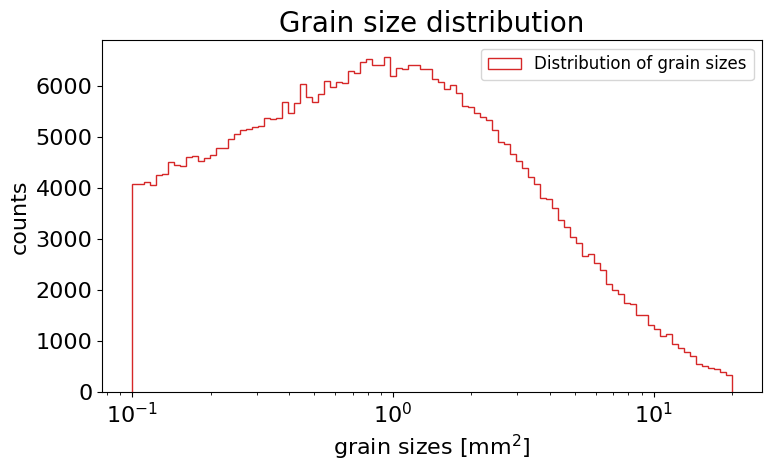

In [25]:
# Drop too small and to big grains and plot histogram of sizes of whole bag
Nbins = 100
xmin = cut_off/1e6
xmax = 20
binwidth = (xmax-xmin)/Nbins

x_logspace = np.logspace(-1,2,100)

sizes_mm = np.array([])
for bag in df.keys():
    df[bag] = df[bag][df[bag].area > cut_off]
    new_array = np.array(df[bag]["area"]/1000000)
    sizes_mm = np.concatenate((sizes_mm, new_array))

counts, bin_edges = np.histogram(sizes_mm, bins=Nbins,range=(xmin, xmax))
x = (bin_edges[1:][counts>0] + bin_edges[:-1][counts>0])/2
y = counts[counts>0]
sy = np.sqrt(counts[counts>0])

def fit_func(x,N,s,loc, scale):
    return N*binwidth*lognorm.pdf(x,s,loc,scale)

Minuit.print_level = 1    # Print result of fits (generally - can also be moved down to each fit instance)

chi2fit = Chi2Regression(fit_func, x, y, sy)

minuit_chi2 = Minuit(chi2fit, N=10000, s=0.9, loc=0,scale=1)
minuit_chi2.errordef = 1.0     # This is the definition for ChiSqaure fits
minuit_chi2.migrad()   

if (not minuit_chi2.fmin.is_valid) :
    print("  WARNING: The ChiSquare fit DID NOT converge!!! ") 

logbins = np.logspace(np.log10(bin_edges[0]),np.log10(bin_edges[-1]),len(bin_edges))

fig, ax = plt.subplots(figsize=(8, 5))
ax.hist(sizes_mm, bins=logbins,label="Distribution of grain sizes",range=(xmin, xmax),histtype="step",color="tab:red")
ax.set(xlabel='grain sizes [mm$^2$]', ylabel='counts',title="Grain size distribution")
ax.set_xscale('log')

#ax.errorbar(x, y, yerr=sy, xerr=0.0, label='Data, with Poisson errors', fmt='.k',  ecolor='k', elinewidth=1, capsize=1, capthick=1)
x_axis = np.linspace(xmin, xmax, 1000)
#ax.plot(x_axis, fit_func(x_axis, *minuit_chi2.values[:]), '-r', label='Chi2 fit model result') 


ax.legend()
fig.tight_layout()
#fig.savefig("Plots/6_size_distribution.png",dpi=100)
fig.show()

### 4. Create dataset of grain sizes with 1mm resolution

In [26]:
def sizes_depth(df,list_bags):
    """
    create dataset of grain sizes over depth for each bag
    ----------------------------------------------
    param: (dict) df: dictonary of dataframes with grain parameters
    param: (arraylike) list_bags: list of complete bags
    return: (dict) df_sizes: dictonary of dataframes with grain sizes over depth data
    """
    df_sizes = {}
    for bag in list_bags: #loop over bags
        print(bag)
        df_sizes[bag] = pd.DataFrame(columns=["crop_image","depth[m]","equivalent_diameter[px]","grain_size[px]","grain_size_err[px]"])
        bag_1 = bag + "_1"
        bag_2 = bag + "_2" 
        depth = [0]
        crop_images = np.unique(df[bag_1].crop_image)
        for i in range(len(crop_images)): #loop over cropped image 
            df_img1_i = df[bag_1][df[bag_1].crop_image==i]
            df_img1_iplus1 = df[bag_1][df[bag_1].crop_image==i+1]
            try:
                df_img2_i = df[bag_2][df[bag_2].crop_image==i]
                df_img2_iplus1 = df[bag_2][df[bag_2].crop_image==i+1]
            except:
                print("Warning: no bag_2 file")
                df_img2_i = df_img1_i
                df_img2_iplus1 = df_img1_iplus1
            depth_start = depth[-1]
            for ii in range(int(len_img/step_size)): #loop over 1mm steps
                x_img = step_size*ii+step_size/2
                if i != 0 and x_img<overlap: #skip overlap (1cm) of all cropped images but first
                    depth_start = depth_start-step_size
                    continue
                depth.append(depth_start+x_img)
                df_img1_interval = df_img1_i[df_img1_i.centroid_x>=x_img-interval_half]
                df_img1_interval = df_img1_interval[df_img1_interval.centroid_x<x_img+interval_half]
                df_img2_interval = df_img2_i[df_img2_i.centroid_x>=x_img-interval_half]
                df_img2_interval = df_img2_interval[df_img2_interval.centroid_x<x_img+interval_half]
                if x_img >= len_img-overlap and i != crop_images[-1]:
                    df_img1_interval_iplus1 = df_img1_iplus1[df_img1_iplus1.centroid_x>=x_img-interval_half]
                    df_img1_interval_iplus1 = df_img1_interval[df_img1_interval.centroid_x<x_img+interval_half]
                    df_img2_interval_iplus1 = df_img2_iplus1[df_img2_iplus1.centroid_x>=x_img-interval_half]
                    df_img2_interval_iplus1 = df_img2_interval[df_img2_interval.centroid_x<x_img+interval_half]
                    df_img_interval = pd.concat([df_img1_interval,df_img2_interval,df_img1_interval_iplus1,df_img2_interval_iplus1],ignore_index=True)
                else:
                    df_img_interval = pd.concat([df_img1_interval,df_img2_interval],ignore_index=True)
                df_img_interval = pd.concat([df_img1_interval,df_img2_interval],ignore_index=True)
                new_size = np.mean(df_img_interval.area)
                new_diameter = np.mean(df_img_interval.equivalent_diameter)
                new_df = pd.DataFrame([[i,depth[-1],new_diameter,new_size,0]],columns=["crop_image","depth[m]","equivalent_diameter[px]","grain_size[px]","grain_size_err[px]"])
                df_sizes[bag] = pd.concat([df_sizes[bag],new_df],ignore_index=True)
            depth[-1] += step_size/2
        df_sizes[bag]["depth[m]"] = df_sizes[bag]["depth[m]"]*px_to_cm/100                 # convert depth from px to m
        #df_sizes[bag]["grain_size[mm^2]"] = df_sizes[bag]["grain_size[mm^2]"]/1000000      # convert size from um^2 to mm^2
    return df_sizes

In [27]:
bag_list1 = ["nmx3642b","nmx3642c","nmx3643b","nmx3644b","nmx3645c","nmx3646b","nmx3647b","nmx3649c","nmx3650c","nmx3651b","nmx3652b",
             "nmx3653b","nmx3655c","nmx3656c","nmx3657b","nmx3658b","nmx3659b","nmx3661b","nmx3662b","nmx3663b","nmx3664d","nmx3665b",
             "nmx3667b","nmx3668c","nmx3669c","nmx3670b","nmx3671b","nmx3673c","nmx3674c","nmx3676c","nmx3677d","nmx3680b","nmx3681c",
             "nmx3682c","nmx3684b","nmx3685c","nmx3686c"]

df_sizes = sizes_depth(df,bag_list1)

nmx3642b
nmx3642c
nmx3643b
nmx3644b
nmx3645c
nmx3646b
nmx3647b
nmx3649c
nmx3650c
nmx3651b
nmx3652b
nmx3653b
nmx3655c
nmx3656c
nmx3657b
nmx3658b
nmx3659b
nmx3661b
nmx3662b
nmx3663b
nmx3664d
nmx3665b
nmx3667b
nmx3668c
nmx3669c
nmx3670b
nmx3671b
nmx3673c
nmx3674c
nmx3676c
nmx3677d
nmx3680b
nmx3681c
nmx3682c
nmx3684b
nmx3685c
nmx3686c


In [28]:
df_sizes["nmx3642b"].tail()

,crop_image,depth[m],equivalent_diameter[px],grain_size[px],grain_size_err[px]
305,5,0.3055,NaN,NaN,0
306,5,0.3065,NaN,NaN,0
307,5,0.3075,NaN,NaN,0
308,5,0.3085,NaN,NaN,0
309,5,0.3095,NaN,NaN,0


In [29]:
# Drop all NaNs at the end of the DFs
for bag in list(df_sizes.keys()):
    for i in np.flip(list(df_sizes[bag].index)):
        if np.isnan(df_sizes[bag]["grain_size[px]"].iloc[i]):
            df_sizes[bag] = df_sizes[bag].drop(index=i)
        else:
            break

### 5. Save as csv

Right end of the image is the top

In [30]:
# Save dataset with grain sizes over depth, has to run right after sizes_depth() function
for bag in df_sizes.keys():
    if bag=="nmx3642b":
        continue
    try:
        bag_number = int(bag[3:-1])
    except:
        print("bag {} has wrong name, which has to be in format of nmx0000a".format(bag))
    bag_top = (bag_number-1)*0.55
    #depth_new = np.arange(bag_top+df_sizes[bag]["depth[m]"].iloc[0],bag_top+df_sizes[bag]["depth[m]"].iloc[-1]+step_size*px_to_cm/100,step_size*px_to_cm/100) use only if bag_top on right side of image
    depth_new = df_sizes[bag]["depth[m]"] + bag_top 
    df_sizes[bag]["depth[m]"] = depth_new
    df_sizes[bag] = df_sizes[bag].sort_values(by=["depth[m]"])

In [31]:
# adjust 3642b
slicing_param = pd.read_csv("/home/jovyan/work/PICE/ResearchGroups/Stratigraphy/Yannick 2022/Data_csv/slicing_param.csv")
slicing_param = slicing_param[slicing_param["name"]=="nmx3642c_1"]
bag = "nmx3642b"
try:
    bag_number = int(bag[3:-1])
except:
    print("bag {} has wrong name, which has to be in format of nmx0000a".format(bag))
bag_top = (bag_number-1)*0.55
print(bag_top)
depth_new = df_sizes[bag]["depth[m]"] + bag_top + (slicing_param["px_right"].iloc[0]-slicing_param["px_left"].iloc[0])*px_to_cm/100
df_sizes[bag]["depth[m]"] = depth_new
df_sizes[bag] = df_sizes[bag].sort_values(by=["depth[m]"])

2002.5500000000002


In [32]:
# save as csv
for bag in df_sizes.keys():
    df_sizes[bag].to_csv("/home/jovyan/work/PICE/ResearchGroups/Stratigraphy/Yannick 2022/Data_csv/grain_sizes_depth/2mm_intervall/{}.csv".format(bag),index=False)

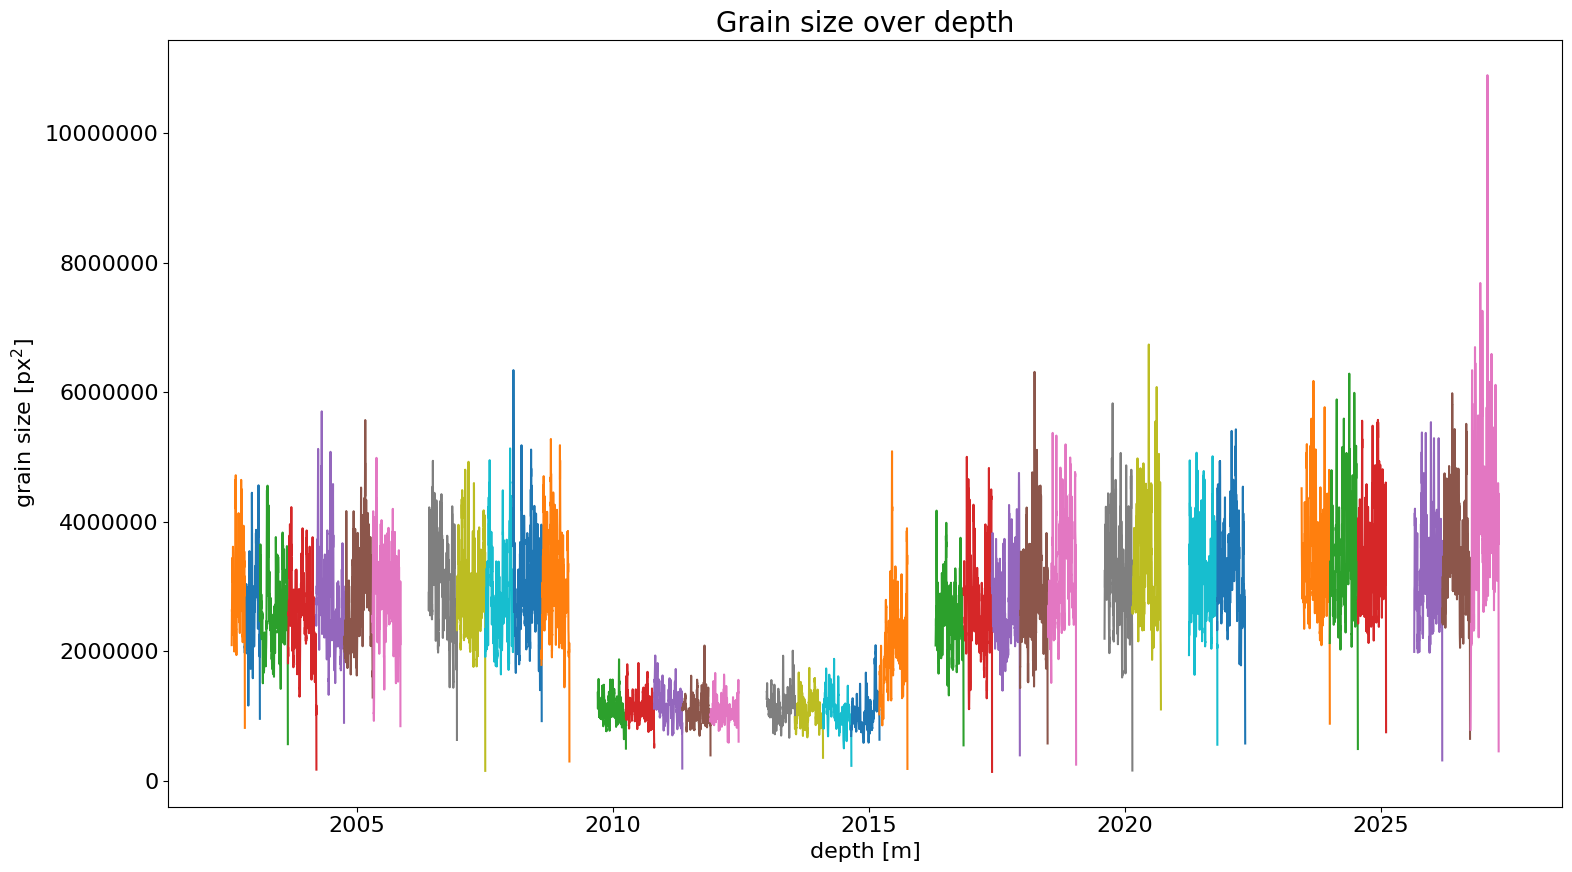

In [17]:
# Plot grain sizes over depth of all cropped images
fig, ax = plt.subplots(1, 1,figsize=(16,9))
#for i in range(1,int(df_sizes["nmx3668c_1"]["depth[cm]"].iloc[-1]/len_img/px_to_cm+1)):
#    ax.vlines(i*len_img*px_to_cm,0,np.max(df_sizes["nmx3668c_1"]["grain_size[mm^2]"]),color="red")
ax.ticklabel_format(useOffset=False,style='plain')
for bag in list(df_sizes.keys()):
    ax.plot(df_sizes[bag]["depth[m]"],df_sizes[bag]["grain_size[px]"],"-",label=bag)
ax.set(title="Grain size over depth",xlabel="depth [m]",ylabel="grain size [px$^2$]")
#ax.legend()
fig.tight_layout()
#fig.savefig("Plots/6_grain_size_NEEM_bags.png",dpi=100)
fig.show()

### 6. Compare data set with image

In [46]:
def plot_image_dataset(df,path,bag,n,image_len):
    """
    make plot of cropped image and dataset
    ----------------------------------------------
    param: (dict) df: dataframes with grain size data of images
    param: (str) path: image path
    param: (str) bag: name of bag
    param: (str) n: number of cropped image
    return: void
    """
    df_img = df[bag][df[bag].crop_image==n]
    file = bag + "_1_{}.png".format(n)
    if path != None:
        os.chdir(path + bag + "_1") 
    img = io.imread(file)
    fig = plt.figure(figsize=(16, 9))   # Make an empty figure
    ax1 = fig.add_axes((.1,.3,.8,.6))    # Add the top subfigure
    ax1.set_title("{}, crop_image={}".format(bag,n))
    ax1.imshow(img)
    ax1.xaxis.get_ticklabels()[1].set_visible(False)      
    ax1.yaxis.get_ticklabels()[-2].set_visible(False)      # Remove bottom y-tick on top subfigure to prevent overlapping ticks
    ax2 = fig.add_axes((0.1625,0.1,0.675,0.2))      # Add bottom subfigure for size over depth plot and have its x-axis follow the top figure
    ax2.set_xlabel("depth[m]")
    ax2.set_ylabel("grain size [mm$^2$]")
    ax2.set_ylim(0,12)
    ax2.plot(df_img["depth[m]"],df_img["grain_size[px]"]/1000000,"-")
    #fig.savefig("Plots/ImageGrainSizes/{}_{}".format(bag,n), dpi=600);

nmx3642c


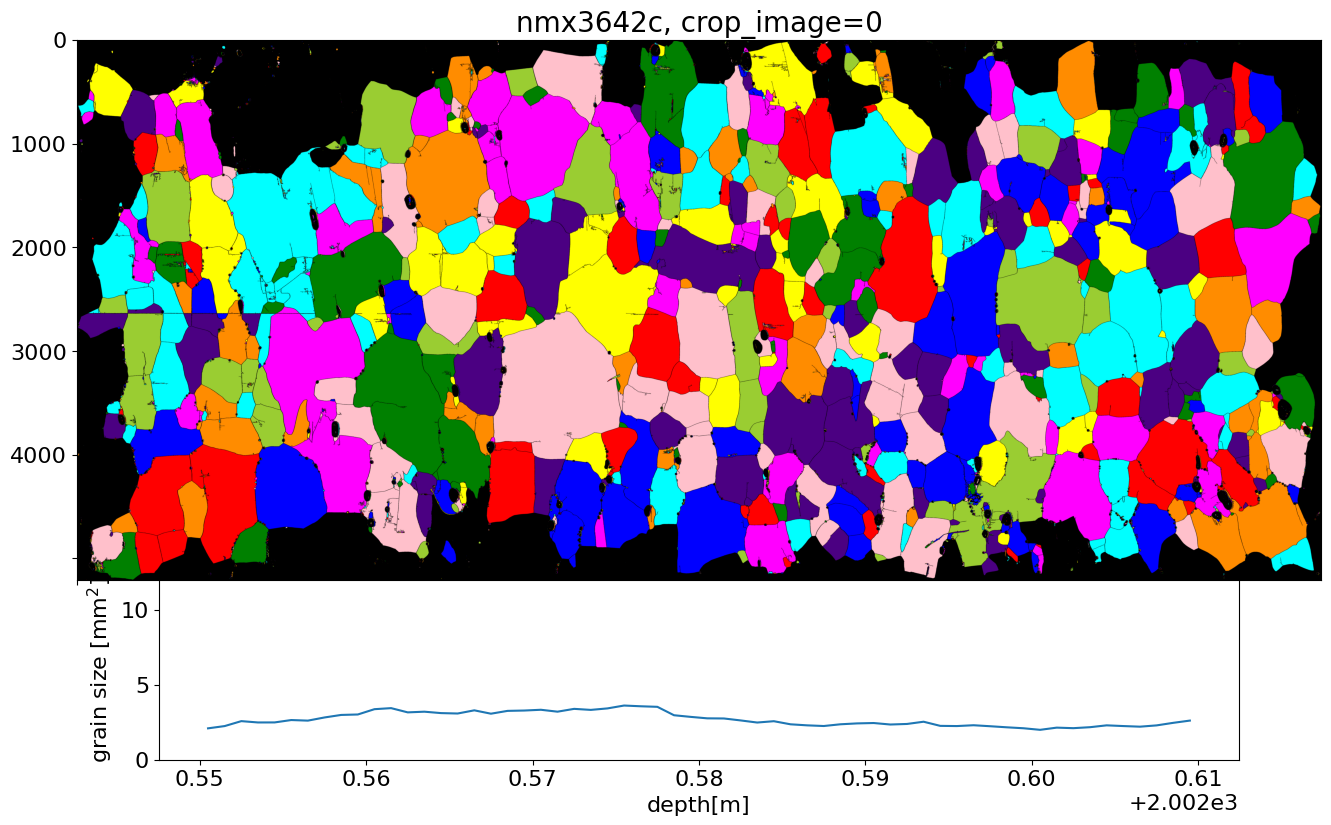

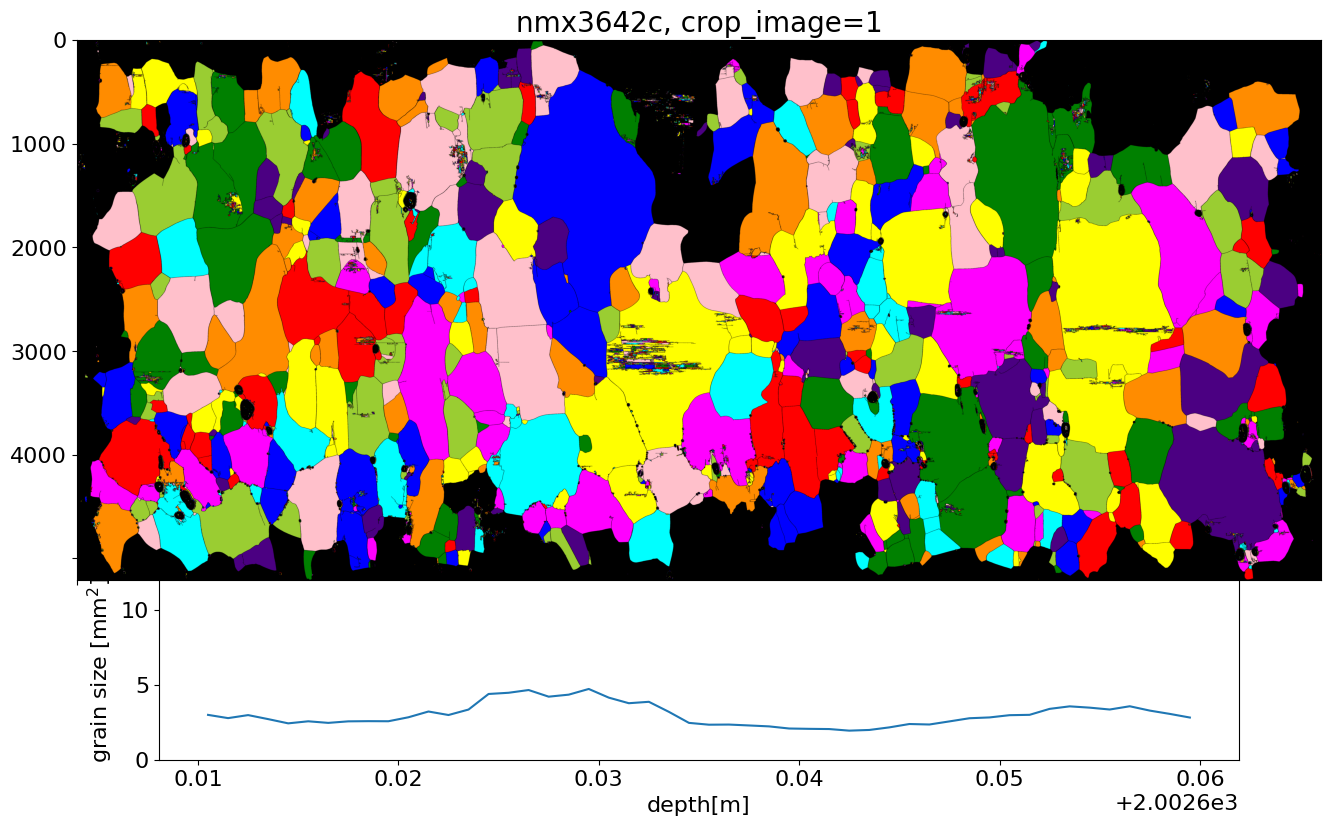

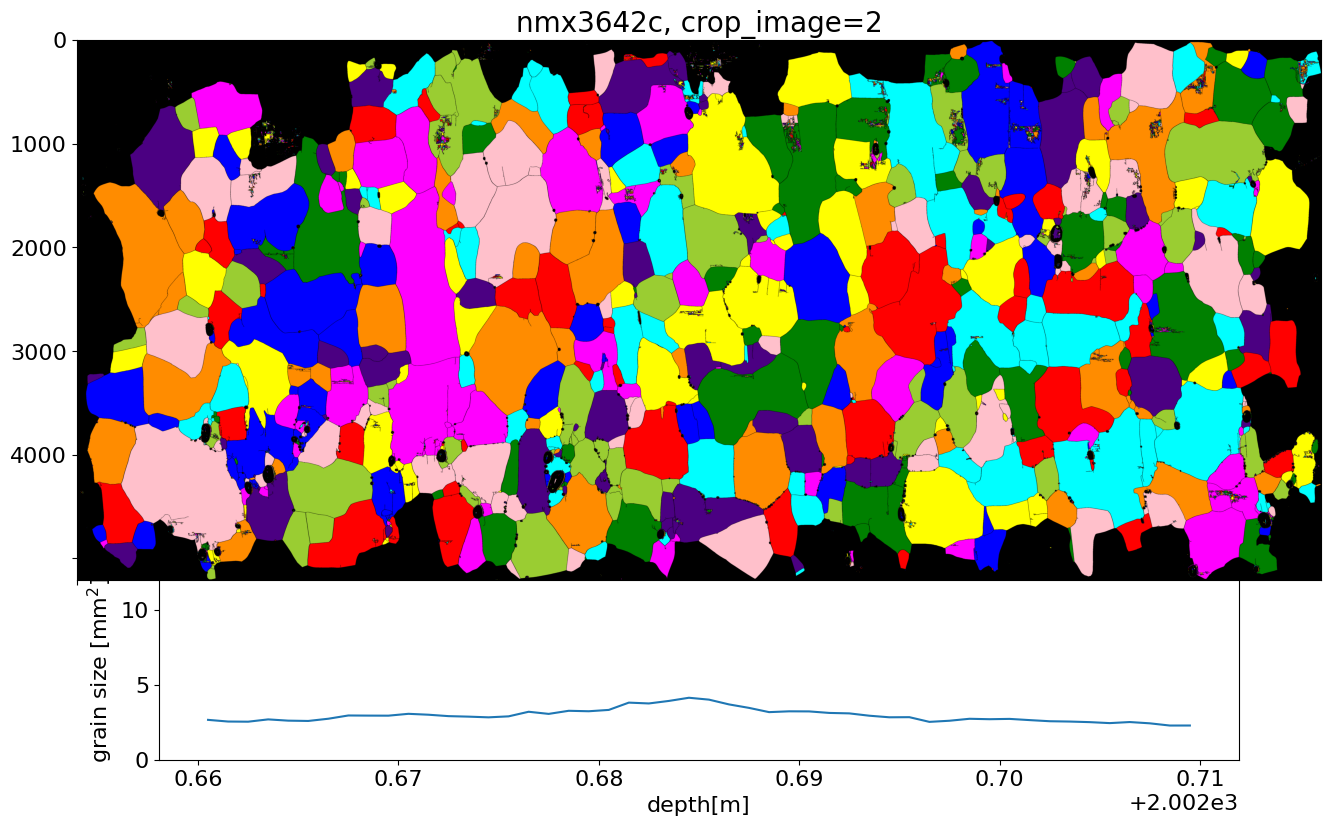

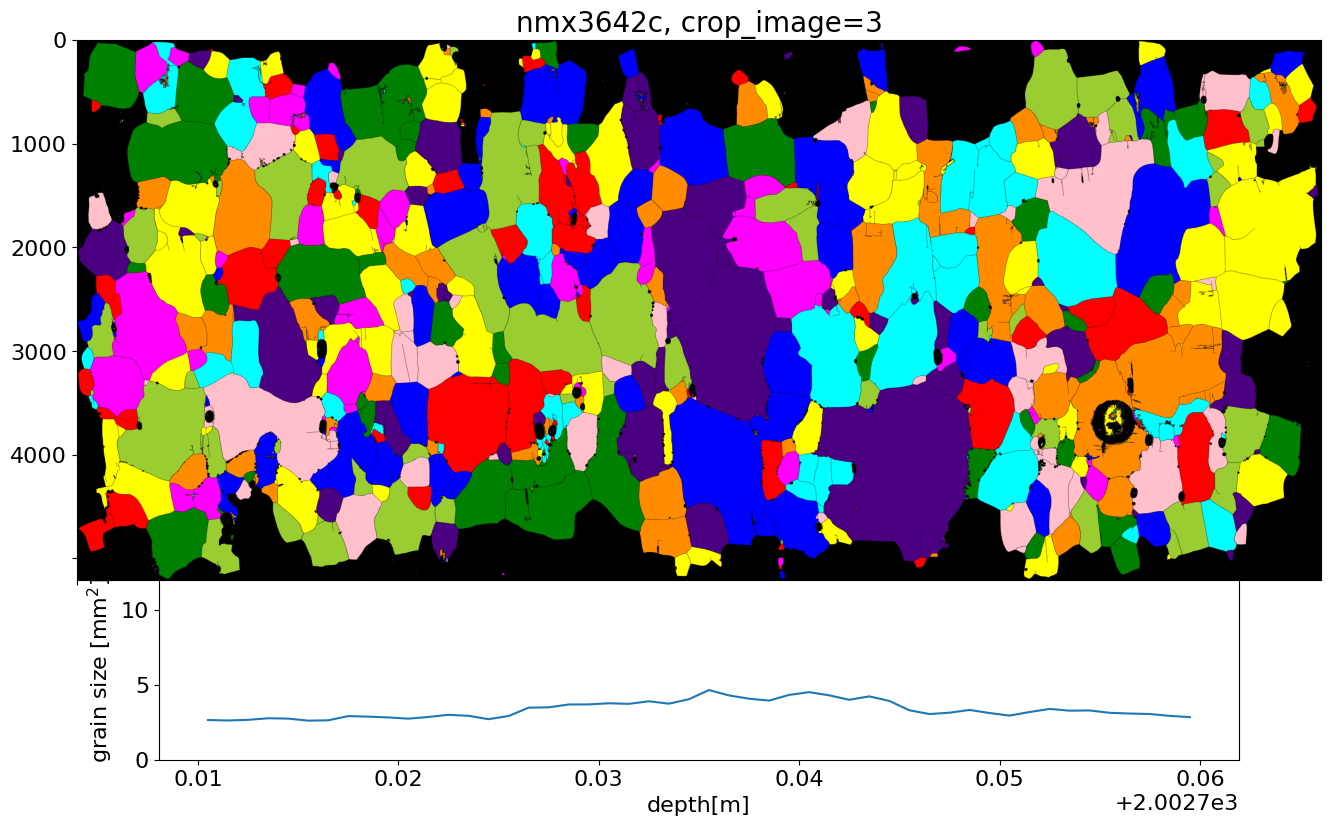

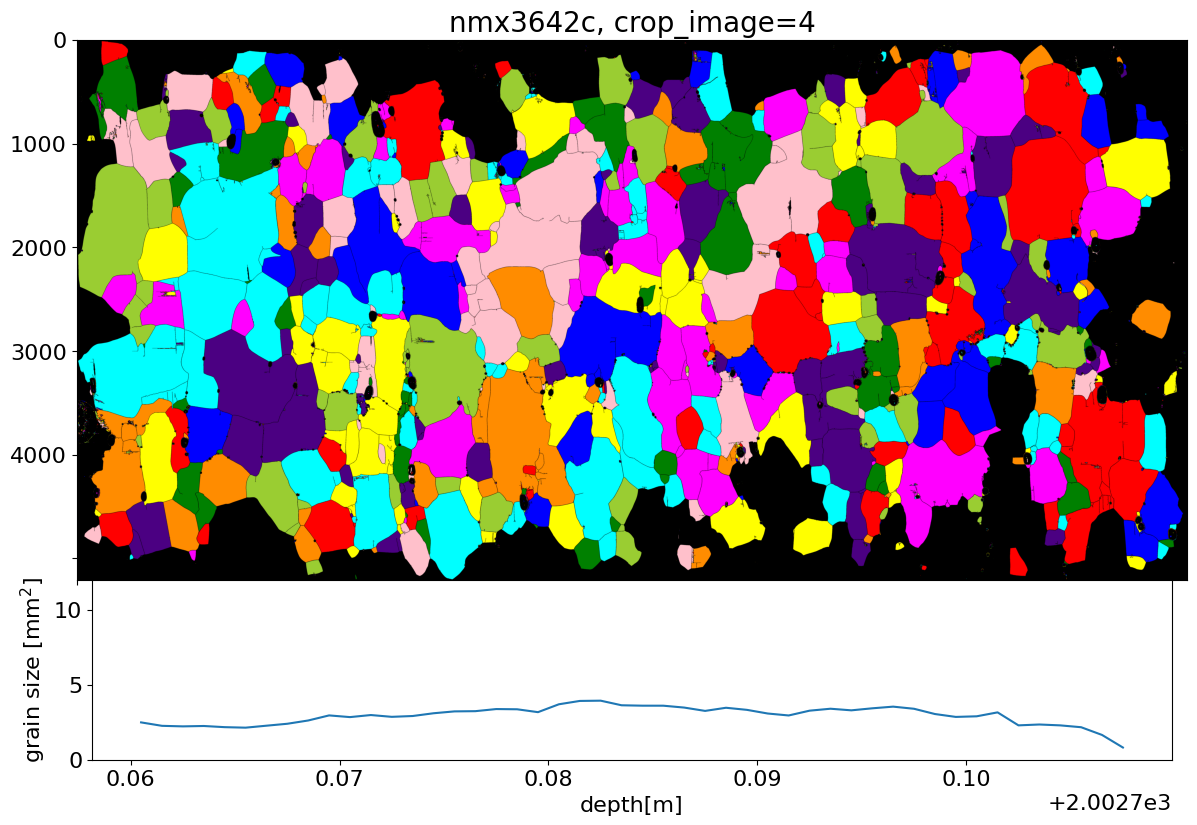

In [48]:
img_path = "/home/jovyan/work/Master Thesis/Plots/NEEM_Labeled_and_Raw_Images/"

for bag in bag_list1[1:2]:
    print(bag)
    for i in range(len(np.unique(df_sizes[bag].crop_image))):
        plot_image_dataset(df_sizes,img_path,bag,i,len_img)

In [21]:
interval_half

703.0